# Quantum Measurement Tomography with Stochastic Gradient Descent (SGD-QMT)
This notebook provides basic tutorial on how to use SGD-QMT code to compute POVM operators for continuous variable system. 
For demonstration purpose, we consider photon detection measurement setting. Look at the paper https://arxiv.org/abs/2511.15682 to get more details on photon detection POVM set.

##### Make sure all the libraries imported in SGD_QMT.py are installed!

In [1]:
import sys
sys.path.insert(0, '..')
from SGD_QMT import *

## Example demonstration: Photon detection measurements in continuous variable system

In [2]:
## Truncated Hilbert space dimension is set to 32
dimension = 32
num_povms = 2


# Create random seed and PRNGKey to generate random intial guess
seed = int(time.time_ns() % (2**32))
key_true = jax.random.PRNGKey(seed)


# Target POVMs
true_povms = get_true_povms_photon_detection(dimension=32)


# Coherent states as a probe states
probe_states = get_coherent_probes(dimension=32, grid_size=25, grid_range=5)


# Target probabilities (This is your experimental data)
target_probs = simulate_measurements(true_povms, probe_states)


## Method 1: HONEST-MSE
Here we implement SGD-QMT using HONEST parametrization with MSE as a loss function. 

Seed value: 1677941248
Training system with 2 POVMs using 'mse' loss


Training:   0%|          | 0/500 [00:00<?, ?it/s]/Users/akshayga/anaconda3/lib/python3.11/site-packages/jax/_src/lax/lax.py:2785: ComplexWarning: Casting complex values to real discards the imaginary part
  x_bar = _convert_element_type(x_bar, x.aval.dtype, x.aval.weak_type)
Step 499, Loss: 1.43153e-06: 100%|██████████| 500/500 [00:01<00:00, 276.73it/s]


Total training time: 1.83 seconds


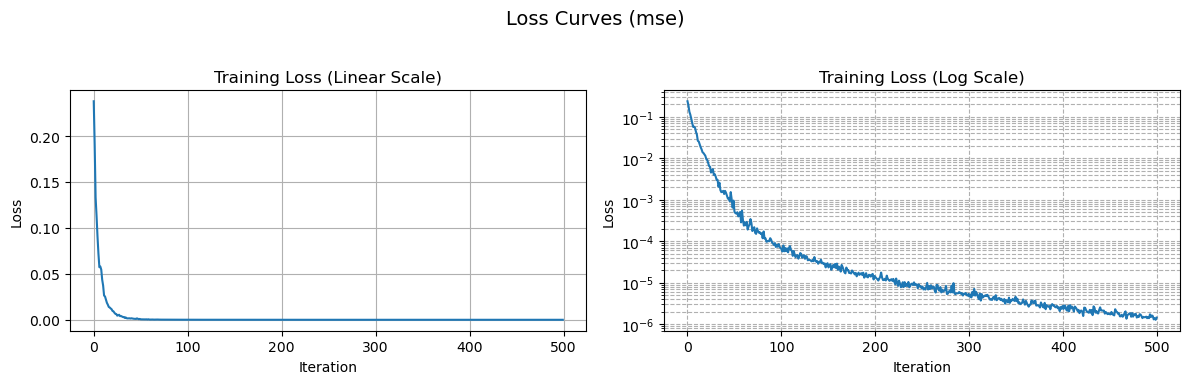

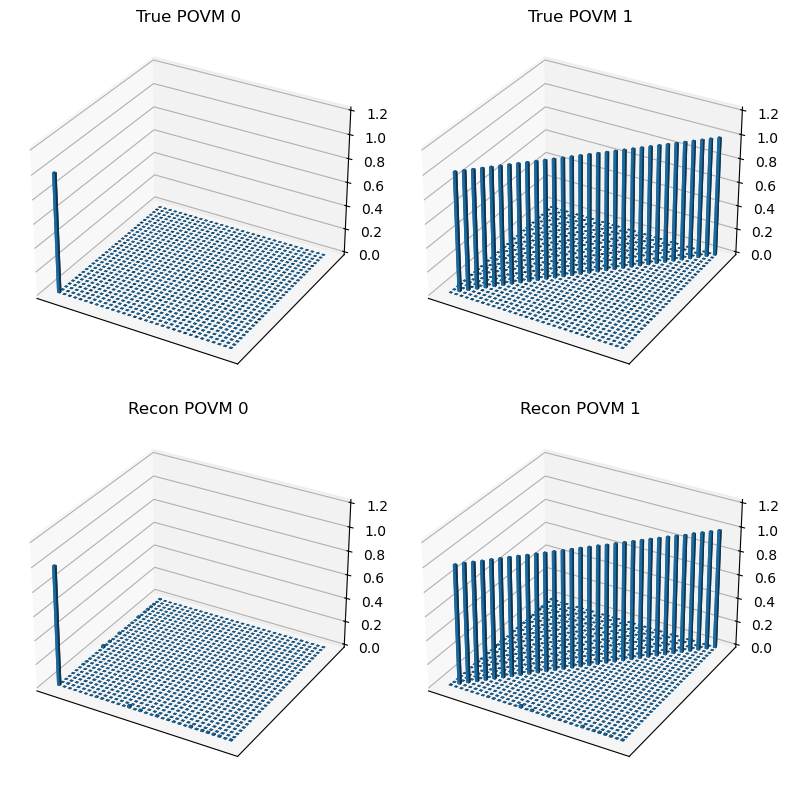

Frobenius norm : 0.0029411379 ± 0.00038312489
Wasserstein    : 0.0000000040 ± 0.00110501188


In [3]:
# Run main SGD-QMT function based on HONEST parameterization with MSE loss
recon_povms, final_probs, losses, times, recon_povms_step, total_time = Run_HonestQMT_StatePovmBatched(dimension, num_povms, rank=dimension, state_batch_size=50, povm_batch_size=num_povms,
                                                                                                        learning_rate=1e-2, n_steps=500, stop=1e-10,
                                                                                     probe_states=probe_states, target_probs=target_probs, LossPlot=True, seed=None, loss_type="mse")

# Graphically compare how well POVMs are constructed
compare_povms_3d(true_povms, recon_povms, num_povms)

# Evaluate quality of reconstructed POVMs
frob_mean, wasserstein_mean, frob_std, wasserstein_std = evaluate_metrics(recon_povms, true_povms, probe_states, target_probs)

print(f"Frobenius norm : {frob_mean:.10f} ± {frob_std:.11f}")
print(f"Wasserstein    : {wasserstein_mean:.10f} ± {wasserstein_std:.11f}")


## Method 2:  HONEST-MLE
Here we implement SGD-QMT using HONEST parametrization with MLE as a loss function. 

Seed value: 1062035952
Training system with 2 POVMs using 'mle' loss


Step 499, Loss: 1.80450e-02: 100%|██████████| 500/500 [00:01<00:00, 353.63it/s]


Total training time: 1.41 seconds


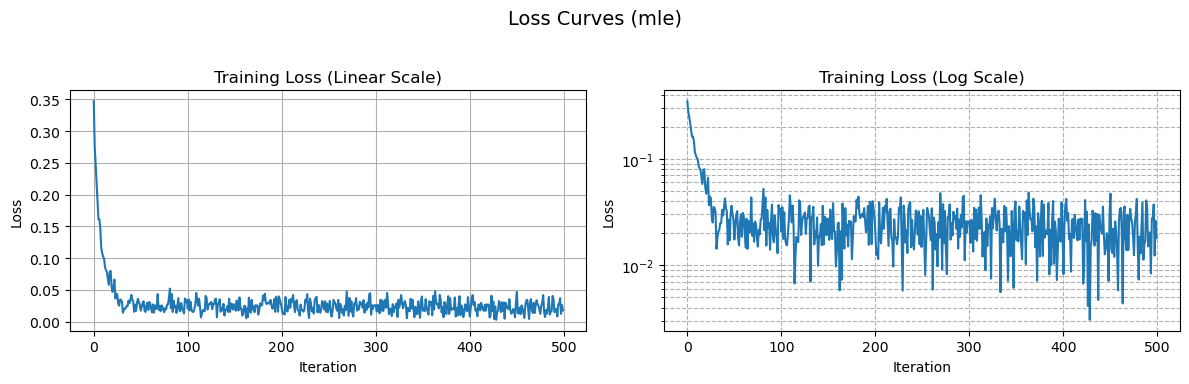

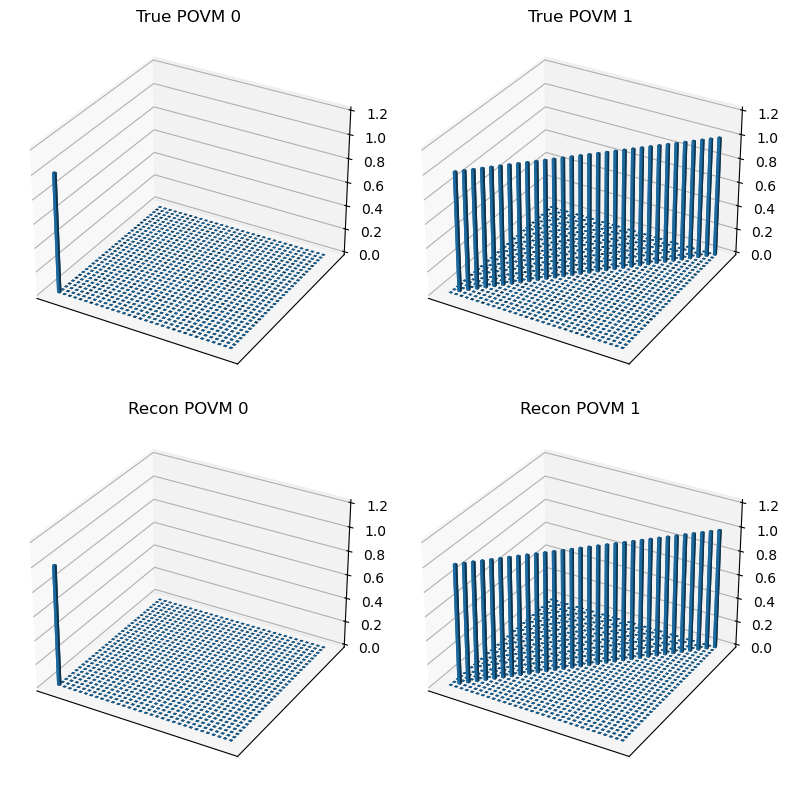

Frobenius norm : 0.0000010258 ± 0.00003011343
Wasserstein    : 0.0000000000 ± 0.00007589416


In [4]:

# Run main SGD-QMT function based on HONEST parameterization with MLE loss
recon_povms, final_probs, losses, times, recon_povms_step, total_time = Run_HonestQMT_StatePovmBatched(dimension, num_povms, rank=dimension, state_batch_size=50, povm_batch_size=num_povms,
                                                                                                        learning_rate=1e-2, n_steps=500, stop=1e-10,
                                                                                     probe_states=probe_states, target_probs=target_probs, LossPlot=True, seed=None, loss_type="mle")

# Graphically compare how well POVMs are constructed
compare_povms_3d(true_povms, recon_povms, num_povms)

# Evaluate quality of reconstructed POVMs
frob_mean, wasserstein_mean, frob_std, wasserstein_std = evaluate_metrics(recon_povms, true_povms, probe_states, target_probs)

print(f"Frobenius norm : {frob_mean:.10f} ± {frob_std:.11f}")
print(f"Wasserstein    : {wasserstein_mean:.10f} ± {wasserstein_std:.11f}")

## Method 3:  SM-MSE
Here we implement SGD-QMT using Stiefel Manifold (SM) parametrization with MSE as a loss function. 

Seed value for initial guess for Run_StiefelManiQMT_StatePovmBatched: 3717061952
Training system with 2 POVMs


Training:   0%|          | 0/500 [00:00<?, ?it/s]/Users/akshayga/anaconda3/lib/python3.11/site-packages/jax/_src/lax/lax.py:2785: ComplexWarning: Casting complex values to real discards the imaginary part
  x_bar = _convert_element_type(x_bar, x.aval.dtype, x.aval.weak_type)
Step 499, Loss: 1.56950e-05: 100%|██████████| 500/500 [00:01<00:00, 469.32it/s]


Total training time for Run_StiefelManiQMT_StatePovmBatched: 1.07 seconds


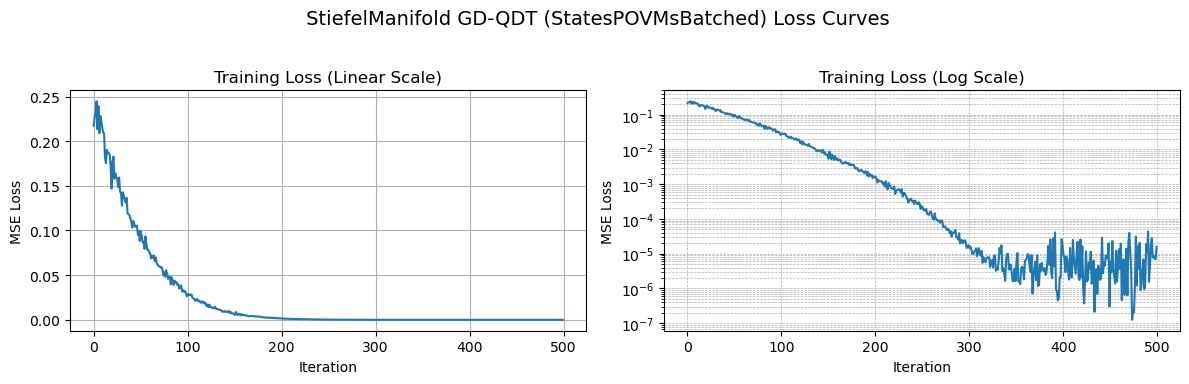

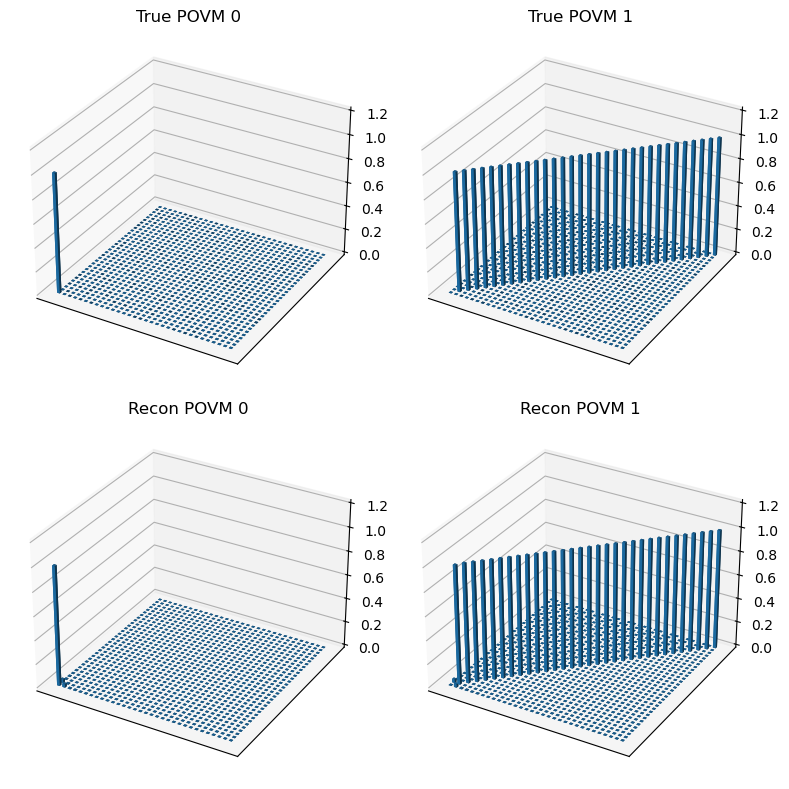

Frobenius norm : 0.0017736116 ± 0.00331162934
Wasserstein    : 0.0000000179 ± 0.00108125975


In [5]:
# Run main SGD-QMT function based on SM parameterization with MSE loss
recon_povms, final_probs, losses, times, recon_povms_step, total_time = Run_StiefelManiQMT_StatePovmBatched(dimension, num_povms, rank=dimension, state_batch_size=50, 
                                                                                                            povm_batch_size=num_povms, learning_rate=5e-2, decay=0.99, 
                                                                                            n_steps=500, stop=1e-10, probe_states=probe_states, target_probs=target_probs, 
                                                                                            LossPlot=True, seed=None, loss_type="mse")

# Graphically compare how well POVMs are constructed
compare_povms_3d(true_povms, recon_povms, num_povms)

# Evaluate quality of reconstructed POVMs
frob_mean, wasserstein_mean, frob_std, wasserstein_std = evaluate_metrics(recon_povms, true_povms, probe_states, target_probs)

print(f"Frobenius norm : {frob_mean:.10f} ± {frob_std:.11f}")
print(f"Wasserstein    : {wasserstein_mean:.10f} ± {wasserstein_std:.11f}")

## Method 4: SM-MLE
Here we implement SGD-QMT using Stiefel Manifold (SM) parametrization with MLE as a loss function. 

Seed value for initial guess for Run_StiefelManiQMT_StatePovmBatched: 1943516656
Training system with 2 POVMs


Training:   0%|          | 0/500 [00:00<?, ?it/s]/Users/akshayga/anaconda3/lib/python3.11/site-packages/jax/_src/lax/lax.py:2785: ComplexWarning: Casting complex values to real discards the imaginary part
  x_bar = _convert_element_type(x_bar, x.aval.dtype, x.aval.weak_type)
Step 499, Loss: 1.66869e-02: 100%|██████████| 500/500 [00:01<00:00, 484.94it/s]


Total training time for Run_StiefelManiQMT_StatePovmBatched: 1.03 seconds


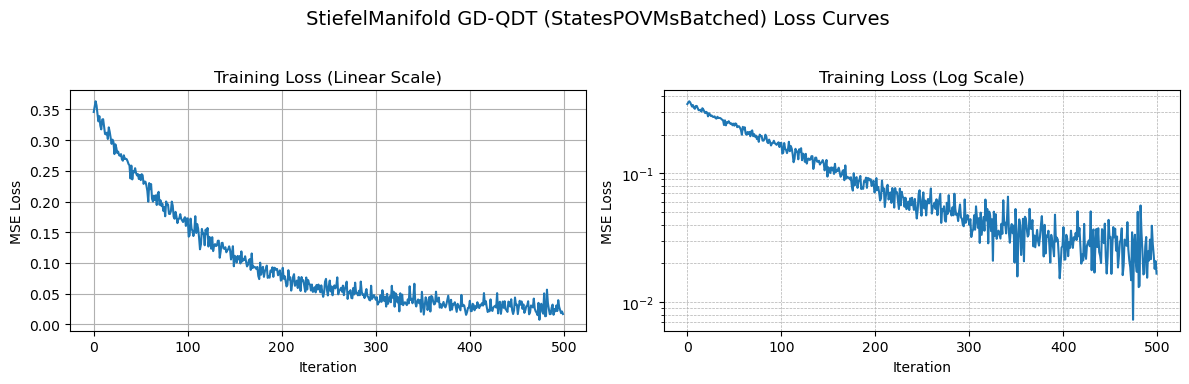

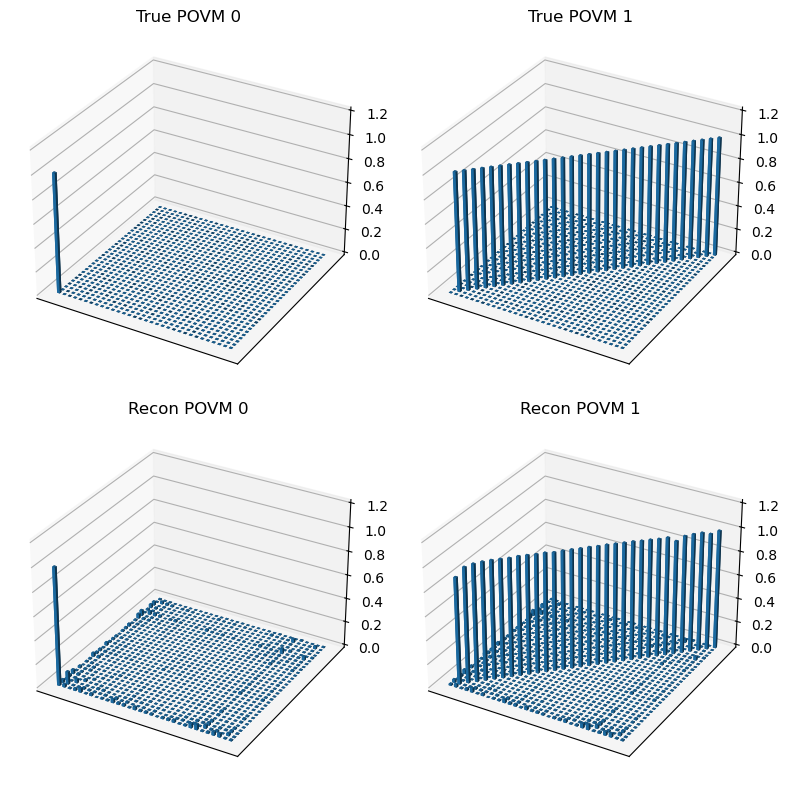

Frobenius norm : 0.0554412156 ± 0.01075077982
Wasserstein    : 0.0089279602 ± 0.00000013599


In [6]:
# Run main SGD-QMT function based on SM parameterization with MLE loss
recon_povms, final_probs, losses, times, recon_povms_step, total_time = Run_StiefelManiQMT_StatePovmBatched(dimension, num_povms, rank=dimension, state_batch_size=50, 
                                                                                                            povm_batch_size=num_povms, learning_rate=5e-2, decay=0.99, 
                                                                                            n_steps=500, stop=1e-10, probe_states=probe_states, target_probs=target_probs, 
                                                                                            LossPlot=True, seed=None, loss_type="mle")

# Graphically compare how well POVMs are constructed
compare_povms_3d(true_povms, recon_povms, num_povms)

# Evaluate quality of reconstructed POVMs
frob_mean, wasserstein_mean, frob_std, wasserstein_std = evaluate_metrics(recon_povms, true_povms, probe_states, target_probs)

print(f"Frobenius norm : {frob_mean:.10f} ± {frob_std:.11f}")
print(f"Wasserstein    : {wasserstein_mean:.10f} ± {wasserstein_std:.11f}")